In [2]:
import pandas as pd
import numpy as np
pd.set_option('display.float_format', lambda x: '%.2f' % x)
# set the options to see all columns, rows
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('max_info_columns', 1001)
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import scale, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
import seaborn as sns
%matplotlib inline
plt.rc('ytick',labelsize=15)
# To use 한글 font in graphs
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus']=False
# 그래프에서 음수값이 나올 때, 깨지는 현상 방지
plt.rc('axes', unicode_minus = False)
import itertools

data_raw =pd.read_csv('./datas/train/dataset_0225_eysight.csv')

data = data_raw.copy()

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 925724 entries, 0 to 925723
Data columns (total 30 columns):
가입자일련번호        925724 non-null int64
성별코드           925724 non-null int64
연령대코드(5세단위)    925724 non-null int64
시도코드           925724 non-null int64
신장(5Cm단위)      925724 non-null float64
체중(5Kg단위)      925724 non-null float64
허리둘레           925724 non-null float64
시력(좌)          925724 non-null int64
시력(우)          925724 non-null int64
청력(좌)          925724 non-null float64
청력(우)          925724 non-null float64
수축기혈압          925724 non-null float64
이완기혈압          925724 non-null float64
식전혈당(공복혈당)     925724 non-null float64
총콜레스테롤         925724 non-null float64
트리글리세라이드       925724 non-null float64
HDL콜레스테롤       925724 non-null float64
LDL콜레스테롤       925724 non-null float64
혈색소            925724 non-null float64
요단백            925724 non-null float64
혈청크레아티닌        925724 non-null float64
(혈청지오티)AST     925724 non-null float64
(혈청지오티)ALT     925724 non-null float64
감마지티

In [4]:
sample_data = data.sample(n=10000)

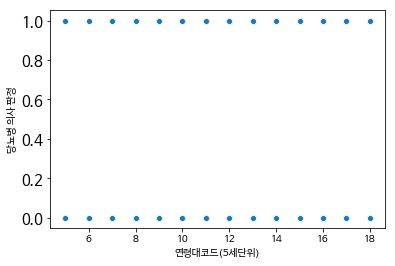

In [5]:
sns.scatterplot(data=sample_data, x = '연령대코드(5세단위)',y = '당뇨병 의사 판정')

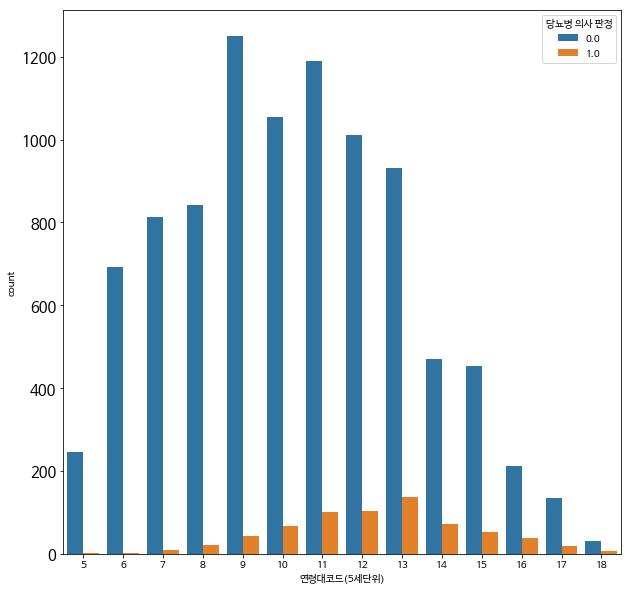

In [6]:
plt.figure(figsize=(10,10))
sns.countplot(data=sample_data, x = '연령대코드(5세단위)',hue = '당뇨병 의사 판정', )

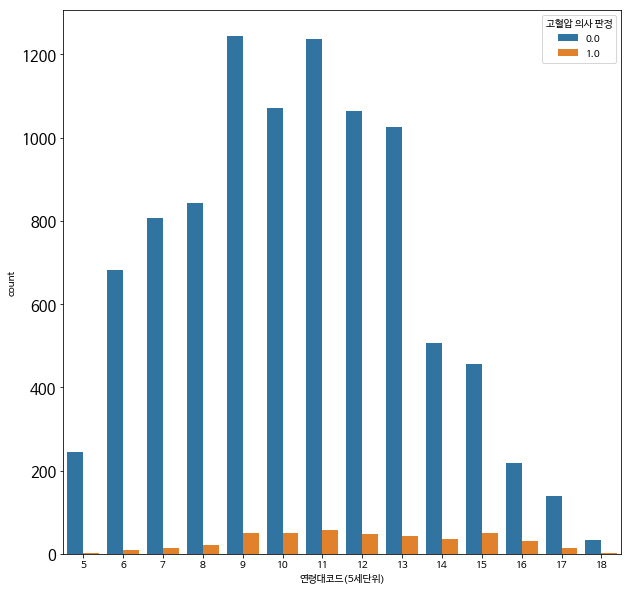

In [7]:
plt.figure(figsize=(10,10))
sns.countplot(data=sample_data, x = '연령대코드(5세단위)',hue = '고혈압 의사 판정')

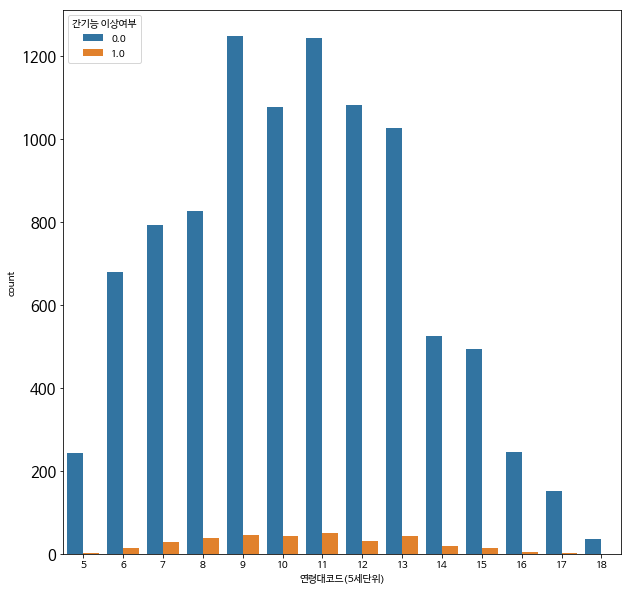

In [8]:
plt.figure(figsize=(10,10))
sns.countplot(data=sample_data, x = '연령대코드(5세단위)',hue = '간기능 이상여부')

In [9]:
data['당뇨병 의사 판정'].value_counts()

0.00    863466
1.00     62258
Name: 당뇨병 의사 판정, dtype: int64

In [10]:
data_raw =pd.read_csv('./datas/train/dataset_0225_eysight.csv')

data = data_raw.copy()

data = data.reset_index(drop=True)

data['고혈압 의사 판정'].value_counts()

data['당뇨병 의사 판정'].value_counts()

data["지질혈증 의사 판정"]=(data['총콜레스테롤']>=240)|(data["트리글리세라이드"]>=200)|(data["HDL콜레스테롤"]<40)|(data["LDL콜레스테롤"]>=160)
data["지질혈증 의사 판정"]=data["지질혈증 의사 판정"].replace({True:1,False:0})

data['지질혈증 의사 판정'].value_counts()

data['합병증'] = (((data['당뇨병 의사 판정'] == 1) & (data['고혈압 의사 판정'] == 1)) 
               | ((data['지질혈증 의사 판정'] == 1) & (data['고혈압 의사 판정'] == 1))
               | ((data['당뇨병 의사 판정'] == 1) & (data['지질혈증 의사 판정'] == 1))
               | ((data['고혈압 의사 판정'] == 1) & (data['당뇨병 의사 판정'] == 1) & (data['지질혈증 의사 판정'] == 1)))

data["합병증"]=data["합병증"].replace({True:1,False:0})

data.info()

data.isnull().sum().sum()

data['합병증'].value_counts()

#병 1개
data['당뇨병_단일'] = ((data['당뇨병 의사 판정'] == 1) & (data['고혈압 의사 판정'] == 0) & (data['지질혈증 의사 판정'] == 0))
data['고혈압_단일'] = ((data['당뇨병 의사 판정'] == 0) & (data['고혈압 의사 판정'] == 1) & (data['지질혈증 의사 판정'] == 0))
data['지질혈증_단일'] = ((data['당뇨병 의사 판정'] == 0) & (data['고혈압 의사 판정'] == 0) & (data['지질혈증 의사 판정'] == 1))
#병 2개
data['합병증_(당뇨_고혈압)'] = ((data['당뇨병 의사 판정'] == 1) & (data['고혈압 의사 판정'] == 1) & (data['지질혈증 의사 판정'] == 0)) 
data['합병증_(지질_고혈압)'] = ((data['지질혈증 의사 판정'] == 1) & (data['고혈압 의사 판정'] == 1) & (data['당뇨병 의사 판정'] == 0))
data['합병증_(당뇨_지질)'] = ((data['당뇨병 의사 판정'] == 1) & (data['지질혈증 의사 판정'] == 1) & (data['고혈압 의사 판정'] == 0))
#병 3개
data['합병증 종합'] = ((data['고혈압 의사 판정'] == 1) & (data['당뇨병 의사 판정'] == 1) & (data['지질혈증 의사 판정'] == 1))

data['당뇨병_단일'] = data['당뇨병_단일'].replace({True:1,False:0})
data['고혈압_단일'] = data['고혈압_단일'].replace({True:1,False:0})
data['지질혈증_단일'] = data['지질혈증_단일'].replace({True:1,False:0})
data['합병증_(당뇨_고혈압)'] = data['합병증_(당뇨_고혈압)'].replace({True:1,False:0})
data['합병증_(지질_고혈압)'] = data['합병증_(지질_고혈압)'].replace({True:1,False:0})
data['합병증_(당뇨_지질)'] = data['합병증_(당뇨_지질)'].replace({True:1,False:0})
data['합병증 종합'] = data['합병증 종합'].replace({True:1,False:0})

data.info()

data['하나만걸린사람'] = data['당뇨병_단일'] + data['고혈압_단일'] + data['지질혈증_단일']

data['하나만걸린사람'].unique()

data = data.reset_index(drop=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 925724 entries, 0 to 925723
Data columns (total 32 columns):
가입자일련번호        925724 non-null int64
성별코드           925724 non-null int64
연령대코드(5세단위)    925724 non-null int64
시도코드           925724 non-null int64
신장(5Cm단위)      925724 non-null float64
체중(5Kg단위)      925724 non-null float64
허리둘레           925724 non-null float64
시력(좌)          925724 non-null int64
시력(우)          925724 non-null int64
청력(좌)          925724 non-null float64
청력(우)          925724 non-null float64
수축기혈압          925724 non-null float64
이완기혈압          925724 non-null float64
식전혈당(공복혈당)     925724 non-null float64
총콜레스테롤         925724 non-null float64
트리글리세라이드       925724 non-null float64
HDL콜레스테롤       925724 non-null float64
LDL콜레스테롤       925724 non-null float64
혈색소            925724 non-null float64
요단백            925724 non-null float64
혈청크레아티닌        925724 non-null float64
(혈청지오티)AST     925724 non-null float64
(혈청지오티)ALT     925724 non-null float64
감마지티

데이터가 지금 전체 데이터에서 질병 하나도 안걸린 애들 그

In [83]:
len(data[data['당뇨병 의사 판정']==1])

62258

In [84]:
len(data[data['고혈압 의사 판정']==1])

36201

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 925724 entries, 0 to 925723
Data columns (total 40 columns):
가입자일련번호         925724 non-null int64
성별코드            925724 non-null int64
연령대코드(5세단위)     925724 non-null int64
시도코드            925724 non-null int64
신장(5Cm단위)       925724 non-null float64
체중(5Kg단위)       925724 non-null float64
허리둘레            925724 non-null float64
시력(좌)           925724 non-null int64
시력(우)           925724 non-null int64
청력(좌)           925724 non-null float64
청력(우)           925724 non-null float64
수축기혈압           925724 non-null float64
이완기혈압           925724 non-null float64
식전혈당(공복혈당)      925724 non-null float64
총콜레스테롤          925724 non-null float64
트리글리세라이드        925724 non-null float64
HDL콜레스테롤        925724 non-null float64
LDL콜레스테롤        925724 non-null float64
혈색소             925724 non-null float64
요단백             925724 non-null float64
혈청크레아티닌         925724 non-null float64
(혈청지오티)AST      925724 non-null float64
(혈청지오티)ALT      92572

In [12]:
msk = ((data['당뇨병 의사 판정']==0) & (data['고혈압 의사 판정']==0) & (data['지질혈증 의사 판정']==0))
print(len(data[msk]))
print(len(data[~msk]))

622707
303017


In [13]:
data[~msk]

,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,구강검진 수검여부,당뇨병 의사 판정,고혈압 의사 판정,간기능 이상여부,알콜성간염여부,지질혈증 의사 판정,합병증,당뇨병_단일,고혈압_단일,지질혈증_단일,합병증_(당뇨_고혈압),합병증_(지질_고혈압),합병증_(당뇨_지질),합병증 종합,하나만걸린사람
0,201061,2,17,45,150.00,135.00,51.00,0,0,1.00,1.00,110.00,65.00,155.00,101.00,81.00,54.00,30.00,11.30,1.00,0.60,21.00,18.00,24.00,1.00,0,1.00,0.00,0.00,0.00,0,0,1,0,0,0,0,0,0,1
6,932701,2,18,27,140.00,30.00,53.00,0,0,2.00,2.00,120.00,70.00,266.00,190.00,86.00,63.00,109.00,9.60,1.00,0.90,26.00,18.00,64.00,1.00,0,1.00,0.00,0.00,0.00,0,0,1,0,0,0,0,0,0,1
33,583341,2,6,11,160.00,45.00,55.00,0,0,1.00,1.00,104.00,60.00,78.00,296.00,95.00,75.00,202.00,13.60,1.00,0.80,23.00,25.00,9.00,1.00,1,0.00,0.00,0.00,0.00,1,0,0,0,1,0,0,0,0,1
36,388833,2,10,47,150.00,50.00,55.00,0,0,1.00,1.00,126.00,77.00,138.00,222.00,101.00,75.00,126.00,13.20,1.00,1.00,32.00,13.00,34.00,1.00,0,1.00,0.00,0.00,1.00,0,0,1,0,0,0,0,0,0,1
38,112857,2,14,30,145.00,35.00,56.00,0,0,2.00,2.00,131.00,68.00,102.00,246.00,54.00,90.00,145.00,14.20,1.00,1.00,25.00,11.00,9.00,1.00,1,0.00,0.00,0.00,1.00,1,0,0,0,1,0,0,0,0,1
41,566417,2,11,26,150.00,35.00,56.00,0,0,1.00,1.00,130.00,82.00,95.00,257.00,124.00,77.00,155.00,12.60,1.00,0.80,22.00,14.00,16.00,1.00,0,0.00,0.00,0.00,0.00,1,0,0,0,1,0,0,0,0,1
72,31765,2,9,47,160.00,40.00,57.00,0,0,1.00,1.00,90.00,60.00,73.00,188.00,64.00,39.00,136.00,13.90,3.00,0.90,16.00,10.00,21.00,1.00,0,0.00,0.00,0.00,0.00,1,0,0,0,1,0,0,0,0,1
104,889345,2,7,48,150.00,45.00,57.00,0,0,1.00,1.00,121.00,73.00,82.00,268.00,76.00,90.00,162.00,12.60,1.00,0.60,11.00,7.00,11.00,1.00,0,0.00,0.00,0.00,0.00,1,0,0,0,1,0,0,0,0,1
112,645293,2,10,26,155.00,60.00,57.00,0,0,1.00,1.00,120.00,80.00,81.00,221.00,220.00,47.00,130.00,14.70,1.00,0.60,18.00,25.00,20.00,1.00,0,0.00,0.00,0.00,0.00,1,0,0,0,1,0,0,0,0,1
113,925053,2,10,43,165.00,75.00,57.00,0,0,1.00,1.00,110.00,70.00,86.00,245.00,107.00,54.00,170.00,13.20,1.00,0.80,20.00,13.00,30.00,1.00,0,0.00,0.00,0.00,0.00,1,0,0,0,1,0,0,0,0,1


In [14]:
# 전체 :925724
# 아무것도 안 걸린 사람 : 622707
# 하나라도 걸린 사람 :  303017
data_illness = data.assign(any_illness= (data['당뇨병 의사 판정']==0) & (data['고혈압 의사 판정']==0) & (data['지질혈증 의사 판정']==0))

In [15]:
data_illness['any_illness']= data_illness['any_illness'].map(lambda x : 0 if x is True else 1)

In [16]:
data_illness.head()

,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,구강검진 수검여부,당뇨병 의사 판정,고혈압 의사 판정,간기능 이상여부,알콜성간염여부,지질혈증 의사 판정,합병증,당뇨병_단일,고혈압_단일,지질혈증_단일,합병증_(당뇨_고혈압),합병증_(지질_고혈압),합병증_(당뇨_지질),합병증 종합,하나만걸린사람,any_illness
0,201061,2,17,45,150.00,135.00,51.00,0,0,1.00,1.00,110.00,65.00,155.00,101.00,81.00,54.00,30.00,11.30,1.00,0.60,21.00,18.00,24.00,1.00,0,1.00,0.00,0.00,0.00,0,0,1,0,0,0,0,0,0,1,1
1,586237,2,12,41,145.00,35.00,51.00,0,0,1.00,1.00,94.00,64.00,89.00,188.00,71.00,66.00,108.00,11.50,1.00,0.80,15.00,14.00,18.00,3.00,0,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0
2,922457,2,9,11,150.00,35.00,51.00,0,0,1.00,1.00,110.00,70.00,94.00,211.00,87.00,87.00,107.00,13.30,1.00,0.70,18.00,10.00,20.00,1.00,1,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0
3,982201,2,10,11,150.00,35.00,52.00,0,0,1.00,1.00,95.00,62.00,74.00,165.00,53.00,80.00,74.00,13.20,1.00,0.70,26.00,23.00,21.00,1.00,1,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0
4,750333,2,5,41,160.00,40.00,52.00,0,0,1.00,1.00,90.00,60.00,90.00,185.00,46.00,71.00,105.00,13.60,1.00,0.70,34.00,34.00,24.00,1.00,1,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0


In [17]:
abc =data_illness.sample(n=10000)

In [30]:
data_illness['any_illness'] =data_illness['any_illness'].map(lambda x : '병 있는 사람' if x == 1 else '병 없는 사람' )

Text(0.5, 1.0, '질병 한 가지라도 갖고 있는 사람')

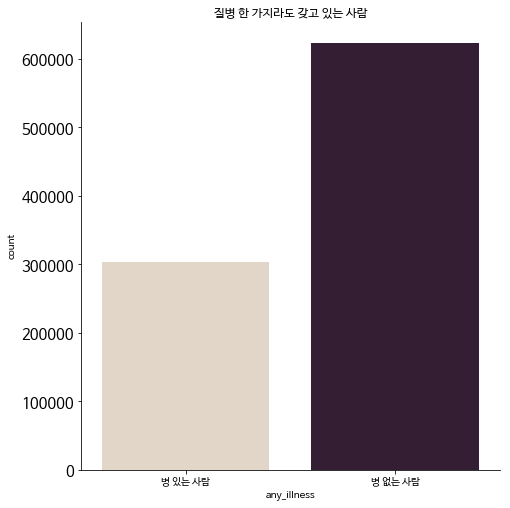

In [42]:
sns.catplot(x="any_illness", kind="count", palette="ch:.25", data=data_illness, height=7)
plt.title("질병 한 가지라도 갖고 있는 사람")

In [46]:
data_illness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 925724 entries, 0 to 925723
Data columns (total 41 columns):
가입자일련번호         925724 non-null int64
성별코드            925724 non-null int64
연령대코드(5세단위)     925724 non-null int64
시도코드            925724 non-null int64
신장(5Cm단위)       925724 non-null float64
체중(5Kg단위)       925724 non-null float64
허리둘레            925724 non-null float64
시력(좌)           925724 non-null int64
시력(우)           925724 non-null int64
청력(좌)           925724 non-null float64
청력(우)           925724 non-null float64
수축기혈압           925724 non-null float64
이완기혈압           925724 non-null float64
식전혈당(공복혈당)      925724 non-null float64
총콜레스테롤          925724 non-null float64
트리글리세라이드        925724 non-null float64
HDL콜레스테롤        925724 non-null float64
LDL콜레스테롤        925724 non-null float64
혈색소             925724 non-null float64
요단백             925724 non-null float64
혈청크레아티닌         925724 non-null float64
(혈청지오티)AST      925724 non-null float64
(혈청지오티)ALT      92572

Text(0.5, 1.0, '당뇨병 환자의 비율')

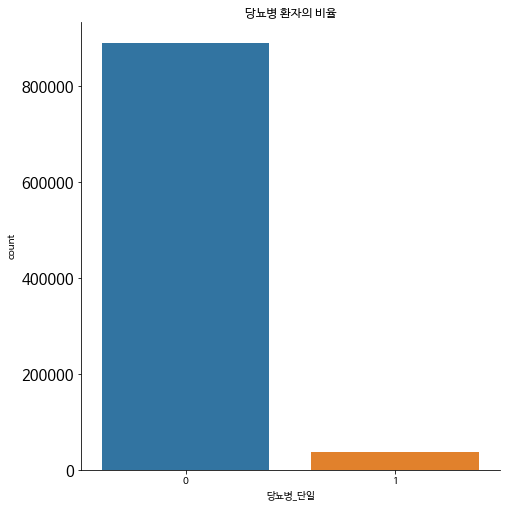

In [53]:
sns.catplot(x='당뇨병_단일',data=data_illness, kind='count',height=7)
plt.title("당뇨병 환자의 비율")


Text(0.5, 1.0, '고혈압 환자의 비율')

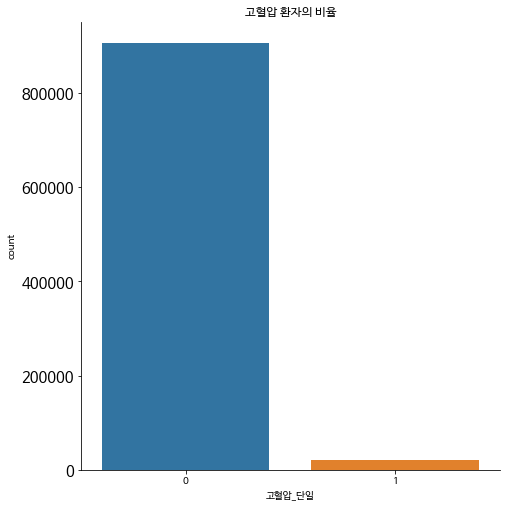

In [48]:
sns.catplot(x='고혈압_단일',data=data_illness, kind='count',height=7)
plt.title("고혈압 환자의 비율")

NameError: name 'r4' is not defined

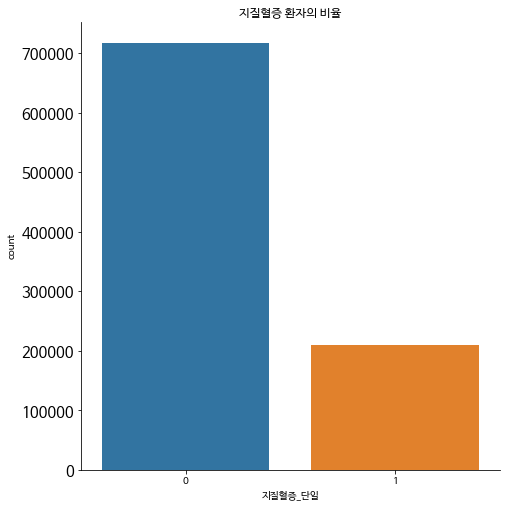

In [51]:
sns.catplot(x='지질혈증_단일',data=data_illness, kind='count',height=7)
plt.title("지질혈증 환자의 비율")
for i in range(len(r4)):
    plt.text(x = r4[i]-0.5 , y = bars4[i]+0.1, s = label[i], size = 6)


Text(0.5, 0, '고혈압 의사 판정')

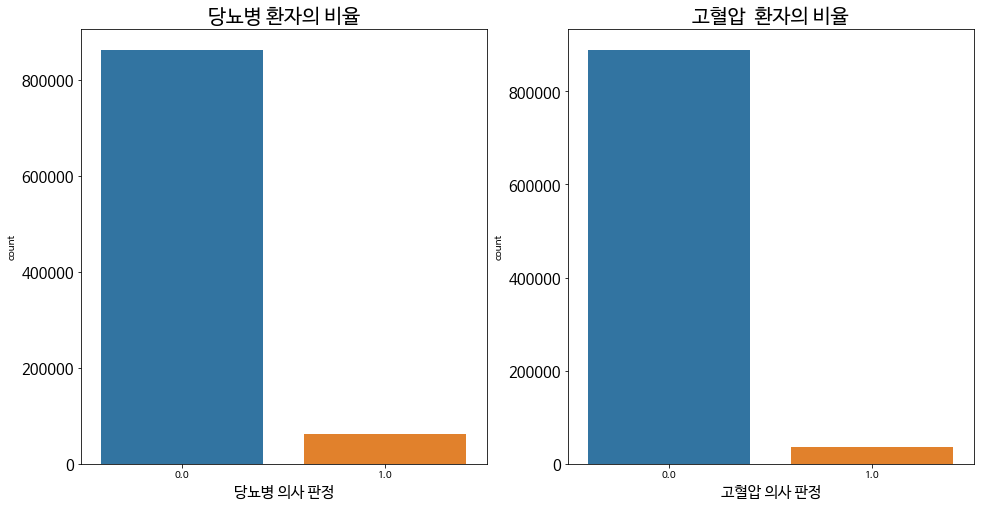

In [82]:
fig, axs = plt.subplots(1, 2, figsize=(16,8))

a=sns.countplot(x='당뇨병 의사 판정',data=data_illness,ax=axs[0])
a.set_title("당뇨병 환자의 비율", fontsize=20)
a.set_xlabel('당뇨병 의사 판정', fontsize=15)
b = sns.countplot(x='고혈압 의사 판정',data=data_illness,ax=axs[1])
b.set_title("고혈압  환자의 비율",fontsize=20)
b.set_xlabel('고혈압 의사 판정', fontsize=15)

In [80]:
data_illness['당뇨병 의사 판정'].value_counts()

0.00    863466
1.00     62258
Name: 당뇨병 의사 판정, dtype: int64

* 